In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import pandas as pd
import seaborn as sn
import plot_confusion_matrix

Using TensorFlow backend.


In [3]:
# Dataset
categories = ['Democrat', 'Republican']
tweetsdf = pd.read_csv('democratvsrepublicantweets/ExtractedTweets.csv')
handlesdf = pd.read_csv('democratvsrepublicantweets/TwitterHandles.csv')
raw_tweets = tweetsdf['Tweet']
parties = tweetsdf['Party']
y = 1.0 - np.asarray(parties == 'Democrat')
X_train, X_test, y_train, y_test = train_test_split(raw_tweets, y, test_size=0.2, random_state=42)

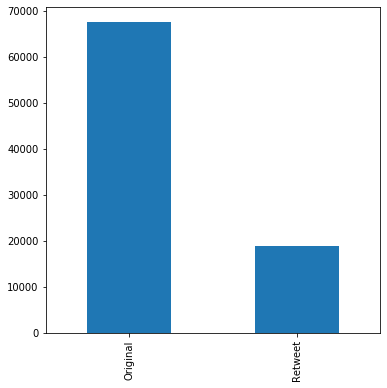

In [4]:
tweetsdf['Tweet'].str.startswith('RT').value_counts().rename({True: 'Retweet', False: 'Original'}).plot.bar(figsize=(6, 6))
plt.show()

In [5]:
handlesdf.head()

,Party,Name,Handle,AvatarURL
0,Democrat,US Rep. Darren Soto,RepDarrenSoto,https://pbs.twimg.com/profile_images/824454906...
1,Democrat,Rep. Jacky Rosen,RepJackyRosen,https://pbs.twimg.com/profile_images/837772241...
2,Democrat,US Rep. Al Lawson Jr,RepAlLawsonJr,https://pbs.twimg.com/profile_images/818493713...
3,Democrat,Adriano Espaillat,RepEspaillat,https://pbs.twimg.com/profile_images/827580972...
4,Democrat,US Rep. Darren Soto,RepDarrenSoto,https://pbs.twimg.com/profile_images/824454906...


In [6]:
parties.value_counts()

Republican    44392
Democrat      42068
Name: Party, dtype: int64

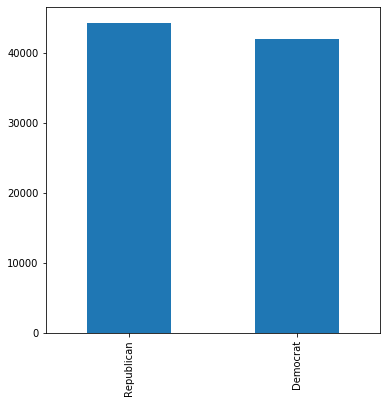

In [7]:
parties.value_counts().plot.bar(figsize=(6, 6))
plt.show()

In [8]:
model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [9]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [28]:
# Results for made up data
docs_new = ['God bless the USA', 
            'Medicare for all', 
            'Cut taxes', 
            'Raise Taxes', 
            'Tax and spend liberals', 
            'Free money for all', 
            'Freedom of speech', 
            'Reproductive rights', 
            'We need to ban guns', 
            'The right to bear arms', 
            'Build the wall', 
            'MAGA', 
            'Secure the border', 
            'Guns do not kill people, people kill people', 
            'We need an energy independent America']
predicted = model.predict(docs_new)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, categories[int(category)]))

'God bless the USA' => Republican
'Medicare for all' => Democrat
'Cut taxes' => Republican
'Raise Taxes' => Republican
'Tax and spend liberals' => Republican
'Free money for all' => Democrat
'Freedom of speech' => Republican
'Reproductive rights' => Democrat
'We need to ban guns' => Democrat
'The right to bear arms' => Republican
'Build the wall' => Democrat
'MAGA' => Republican
'Secure the border' => Republican
'Guns do not kill people, people kill people' => Democrat
'We need an energy independent America' => Democrat


In [12]:
predictions = model.predict(X_test)

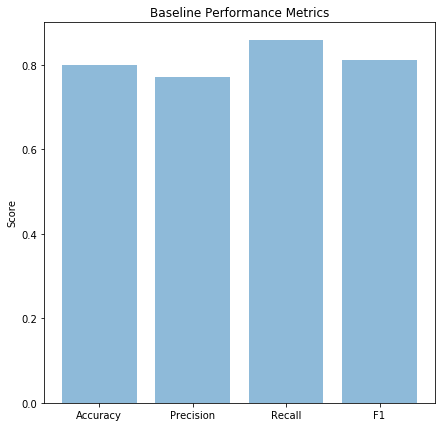

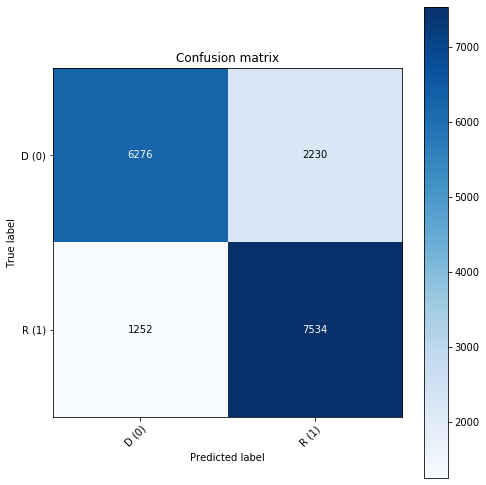

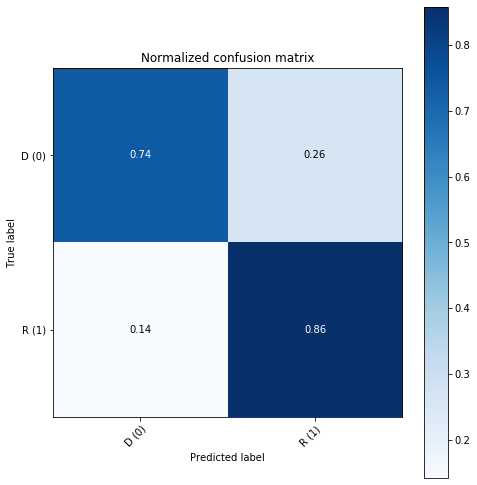

Accuracy: 0.7986352070321536
Precision: 0.7716099959033184
Recall: 0.8575005690871842
F1: 0.8122911051212938


In [14]:
metrics, confusion_matrix = models.plot_results(y_test, predictions)
(accuracy, precision, recall, f1) = metrics
print('Accuracy: %s' % accuracy)
print('Precision: %s' % precision)
print('Recall: %s' % recall)
print('F1: %s' % f1)

In [15]:
metrics

[0.7986352070321536,
 0.7716099959033184,
 0.8575005690871842,
 0.8122911051212938]